Osnabrück University - Machine Learning (Summer Term 2019) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 05

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 12, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 0: Math recap (Derivatives in higher dimensions) [2 Points]

This exercise is supposed to be very easy but in this and the following sheets we will give points. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a partial derivative? What is a directional derivative? How are these computed?

YOUR ANSWER HERE

**b)** What is the gradient, the Jacobian matrix, and the Hessian matrix? How are they computed?

YOUR ANSWER HERE

**c)** What is the chain rule (in calculus)? How does it look in the higher-dimensional case?

YOUR ANSWER HERE

## Assignment 1: Curse of Dimensionality [5 Points]

For the following exercise, be detailed in your answers and provide some examples. Think about keywords like: random vectors in high dimensional space, manifolds and Bertillonage.

**a)** What are the curse of dimensionality and its implication for pattern classification? 

The curse of dimansionality is a combinatorial explosion of possible instances. The amount of possible combinations a sample can have grows exponentially with a growing amount of dimensions. Because of the enormous size of the resulting space, the samples become computationally impossible to handle.

**b)** Explain how this phenomenom could be used to one's advantage.

When one deals with high dimensional data it is often easier to seperate the data with a linear function compared to low dimensional data.

**c)** Explain in your own words the concepts of descriptive and intrinsic dimensionality.

Intrinsic dimensionality is the minimal dimensionality necessary to describe a data set. It consists of independent attributes which are sufficient to describe the data. The intrinsic dimentionality depends on the type of data and not on the problem or the method of collecting the data. Descriptive dimensionality is the dimensionality that arise from the framing of the problem and the method of the data collection. The intrinsic and describtive dimensionality can differ significantly.

**d)** The $n$-dimensional unit cube: A cube with edge length $d=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume and the length of the diagonal for $n = 1, 2, 3, 4, 5, 10, 100, 1000$. Do the same for $d=\frac{1}{2}$. Discuss the result.

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '100'),
 Text(0, 0, '1000')]

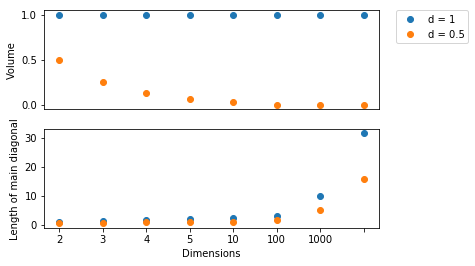

In [93]:
import numpy as np
import math

def n_cube_vol(edge_len, dim):
    return np.round_(edge_len**dim, 3)

def n_cube_dia_len(edge_len, dim):
    arr = np.full(shape=dim, fill_value=edge_len)
    arr = arr * arr
    res = np.sqrt(arr.sum())
    return np.round_(res, 3)


dimensions = [1, 2, 3, 4, 5, 10, 100, 1000]
df = pd.DataFrame()
df['Dimensions'] = dimensions
df['Volume1'] = [n_cube_vol(1, dim) for dim in df['Dimensions']]
df['Volume0.5'] = [n_cube_vol(.5, dim) for dim in df['Dimensions']]
df['Diagonal1'] = [n_cube_dia_len(1, dim) for dim in df['Dimensions']]
df['Diagonal0.5'] = [n_cube_dia_len(.5, dim) for dim in df['Dimensions']]

fig, axes = plt.subplots(nrows=2)

axes[0].plot(df['Volume1'],'o', label='d = 1')
axes[0].plot(df['Volume0.5'], 'o', label='d = 0.5')
axes[0].set_ylabel('Volume')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].set_xticks([])
axes[1].plot(df['Diagonal1'], 'o', label='d = 1')
axes[1].plot(df['Diagonal0.5'], 'o', label='d = 0.5')
axes[1].set_xlabel('Dimensions')
axes[1].set_ylabel('Length of main diagonal')
axes[1].set_xticklabels(dimensions)
#for i in dimensions:
    #print('Dimension: {:<8} Volume: {:<8} Diagonal: {}'.format(i, n_cube_vol(1, i), n_cube_dia_len(1, i)))

#for i in dimensions:
    #print('Dimension: {:<8} Volume: {:<8} Diagonal: {}'.format(i, n_cube_vol(0.5, i), n_cube_dia_len(0.5, i)))

for d = 1/2 the volume decreases exponentially. The diagonal is linearly related to the diagonal d = 1.

**e)** The $n$-dimensional unit ball: A ball with radius $r=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume for $n = 1,2,3,5,10,100,300,400$. Refer to https://en.wikipedia.org/wiki/Volume_of_an_n-ball for the formulae. 

Consider a $n$-dimensional unit orange consisting of the peel and the pulp: Let the thickness of the peel be $1%$ of the radius. Compute the volume of the peel and compare to the volume of the whole orange for the same values of $n$. State the implications of your observations.

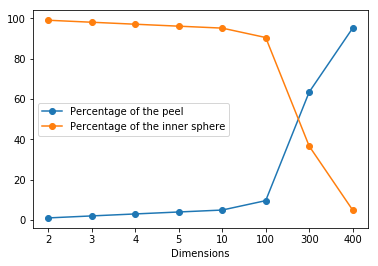

In [45]:
from scipy.special import gamma
import pandas as pd
from matplotlib import pyplot as plt
def n_ball_vol(r, dim):
    vol = np.divide(np.pi**(np.divide(dim, 2)), gamma(np.divide(dim,2)+1))*(r**dim)
    return vol

r = 1
dims = [1, 2, 3, 4, 5, 10, 100, 300, 400]

df = pd.DataFrame()
df['Dimensions'] = dims
df['Outer Sphere'] = [n_ball_vol(r, dim) for dim in df['Dimensions']]
df['Inner Sphere'] = np.array([n_ball_vol(r*0.99, dim) for dim in df['Dimensions']])
df['Peel'] = df['Outer Sphere'] - df['Inner Sphere']
df['PeelPerc'] = 100 * df['Peel'] / df['Outer Sphere']
df['InnerPerc'] = 100 * df['Inner Sphere'] / df['Outer Sphere']

#                           np.array([n_ball_vol(r, dim) for dim in df['Dimensions']]) - np.array([n_ball_vol(r*0.1, dim) for dim in df['Dimensions']])
fig, ax = plt.subplots()
ax.plot(df['PeelPerc'], 'o-', label='Percentage of the peel')
ax.plot(df['InnerPerc'], 'o-', label='Percentage of the inner sphere')
ax.set_xlabel('Dimensions')
ax.set_xticklabels([1,2,3,4,5,10,100,300,400])
ax.legend()
plt.show()

As the dimensions go to infinity the percentage of the unit spheres volume covered by the inner sphere goes to 0. So most of the volume at some point is in the peel.

## Assignment 2: Implement and Apply PCA [8 Points]

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset (simplified from the JSE [2004 New Car and Truck Data](http://www.amstat.org/publications/jse/jse_data_archive.htm)). This dataset consists of measurements taken on 97 different cars. The eleven features measured are: Suggested retail price (USD), Price to dealer (USD), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage, Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches). 

We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [ ]:
import numpy as np

# TODO: Load the cars dataset in cars.csv .
# YOUR CODE HERE

assert cars.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)

Excecute the following code which will create a scatter plot matrix (it might take some time to execute). This should give you an idea about trends and correlations in the dataset.

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
cols = ['Suggested retail price (USD)', 'Price to dealer (USD)', 
          'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']

df = pd.DataFrame(cars, columns=cols)
sns.pairplot(df)

As a first step we need to normalize the data such that they have a zero mean and a unit standard deviation. Use the standard score for this:
$$\frac{X - \mu}{\sigma}$$

In [ ]:
import numpy as np

# TODO: Normalize the data and store them in a variable called cars_norm.
# YOUR CODE HERE

assert cars_norm.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)
assert np.abs(np.sum(cars_norm)) < 1e-10, "Absolute sum was {} but should be close to 0".format(np.abs(np.sum(cars_norm)))
assert np.abs(np.sum(cars_norm ** 2) / cars_norm.size - 1) < 1e-10, "The data is not normalized, sum/N was {} not 1".format(np.sum(cars_norm ** 2) / cars_norm.size)

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the covariance matrix. So we need to calculate the autocovariance matrix and afterwards the eigenvalues. When the data is normalized the autocovariance is calculated as
$$C = X^T\cdot X$$
with $X$ being an $m \times n$ matrix with $n$ features and $m$ samples.
The entry $c_{i,j}$ in $C$ tells you how much feature $i$ correlates with feature $j$. 
(Note: sometimes the formula $C=X\cdot X^T$ can be found, i.e., with rows and columns swapped. This depends on whether your put the individual datapoints as rows or columns in you matrix $X$. However, in the end you want to know how the individual features correlate, i.e., in our example you want a $11\times11$-matrix).

In [ ]:
import numpy as np

# TODO: Compute the autocovariance matrix and store it into autocovar
# YOUR CODE HERE

assert autocovar.shape == (11, 11)

# TODO: Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
# YOUR CODE HERE

assert eigenval.shape == (11,)

assert eigenvec.shape == (11, 11)

Plot the spectrum of the eigenvalues to make sure that they are sorted by their magnitude. How many principal components should you include based on the spectrum plot?

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot? (**put your answer in the cell below of this code cell**)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,0:2]

# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components')
fig.gca().set_xlim(-8, 8)
fig.gca().set_ylim(-4, 7)
plt.scatter(proj[:,0], proj[:,1])
# Divide plot into quadrants
plt.axhline(0, color='green')
plt.axvline(0, color='green')
# force drawing on 'run all'
fig.canvas.draw()

# Plot eigenvectors
eig_fig = plt.figure('Eigenvector plot')
plt.scatter(eigenvec[:,0], eigenvec[:,1])

# add labels
labels = ['Suggested retail price (USD)', 'Price to dealer (USD)', 
          'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']
for label, x, y in zip(labels, eigenvec[:,0], eigenvec[:,1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
# force drawing on 'run all'
eig_fig.canvas.draw()

YOUR ANSWER HERE

## Assignment 3: PCA [3 Points]

In this exercise we investigate the statement from the lecture that PCA finds the subspace that captures most of the data variance. To be more precise, we show that the orthonormal projection onto an $m$-dimensional subspace that maximizes the variance of the projected data is defined by the principal components, i.e. by the $m$ eigenvectors of the autocorrelation matrix $C$ corresponding to the $m$ largest eigenvalues. The proof consists of two steps. In this exercise you will only proof the first step:

### First step:
Consider a one dimensional subspace: determine a (unit) vector $\vec{p}$, such that the variance of the data, when projected onto the subspace determined by that vector, is maximal.

The autocorrelation matrix $C$ allows to compute the variance of the projected data as $\vec{p}^{T}C\vec{p}$. We want to maximize this expression. To avoid $\|\vec{p}\|\to\infty$ we will only consider unit vectors, i.e. we constrain $\vec{p}$ to be normalized: $\vec{p}^T\vec{p}=1$. Maximize the expression with this constraint (which can be done using a Lagrangian multiplier). Conclude that a suitable $\vec{p}$ has to be an eigenvector of $C$ and describe which of the eigenvectors is optimal.

YOUR ANSWER HERE

### Second step:
(Outline for the interested reader. You do not have to solve this second part.)

In the second step the statement for the general case of an $m$-dimensional projection space is proofed by induction:

Assume the statement has been shown for the $(m-1)$-dimensional projection space, spanned by the $m-1$ (orthonormal) eigenvectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$ corresponding to the $(m-1)$ largest eigenvalues $\lambda_1,\ldots,\lambda_{m-1}$. Now find a (unit) vector $\vec{p}_m$, orthogonal to the existing vectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$, that maximizes the projected variance $\vec{p}_m^TC\vec{p}_m$. Proceed similar to the first step, but with additional Lagrangian multipliers to enforce the orthogonality constraint. One can then show that the new vector $\vec{p}_m$ is an eigenvector of $C$. Finally it can be shown that the variance is maximized for the eigenvector corresponding to the $m$-th largest eigenvalue $\lambda_m$.